In [1]:
!pip install mido
!pip install rtmidi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 2.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 KB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rtmidi: filename=rtmidi-2.3.4-cp39-cp39-linux_x86_64.whl size=380593 sha256=5af7ca3ad228c3302fec8d53aa1394452a00bad88df0c695ee8baa97a6c85e77
  Stored in directory: /root/.cache/pip/wheels/23/a7/2b/a508eae8aa1bbff84a60654ddd9175491990d33be3db0663ed
Successfully built rtmidi


In [25]:
import pandas as pd
midi=pd.DataFrame()
midi['subject']=['k7','k7','k7','k8','k8','k8','k9','k9','k9','k10','k10','k10','k11','k11','k11','k12','k12','k12']
midi['exp_code']=['A','B','C','A','B','C','A','B','C','A','B','C','A','B','C','A','B','C']

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

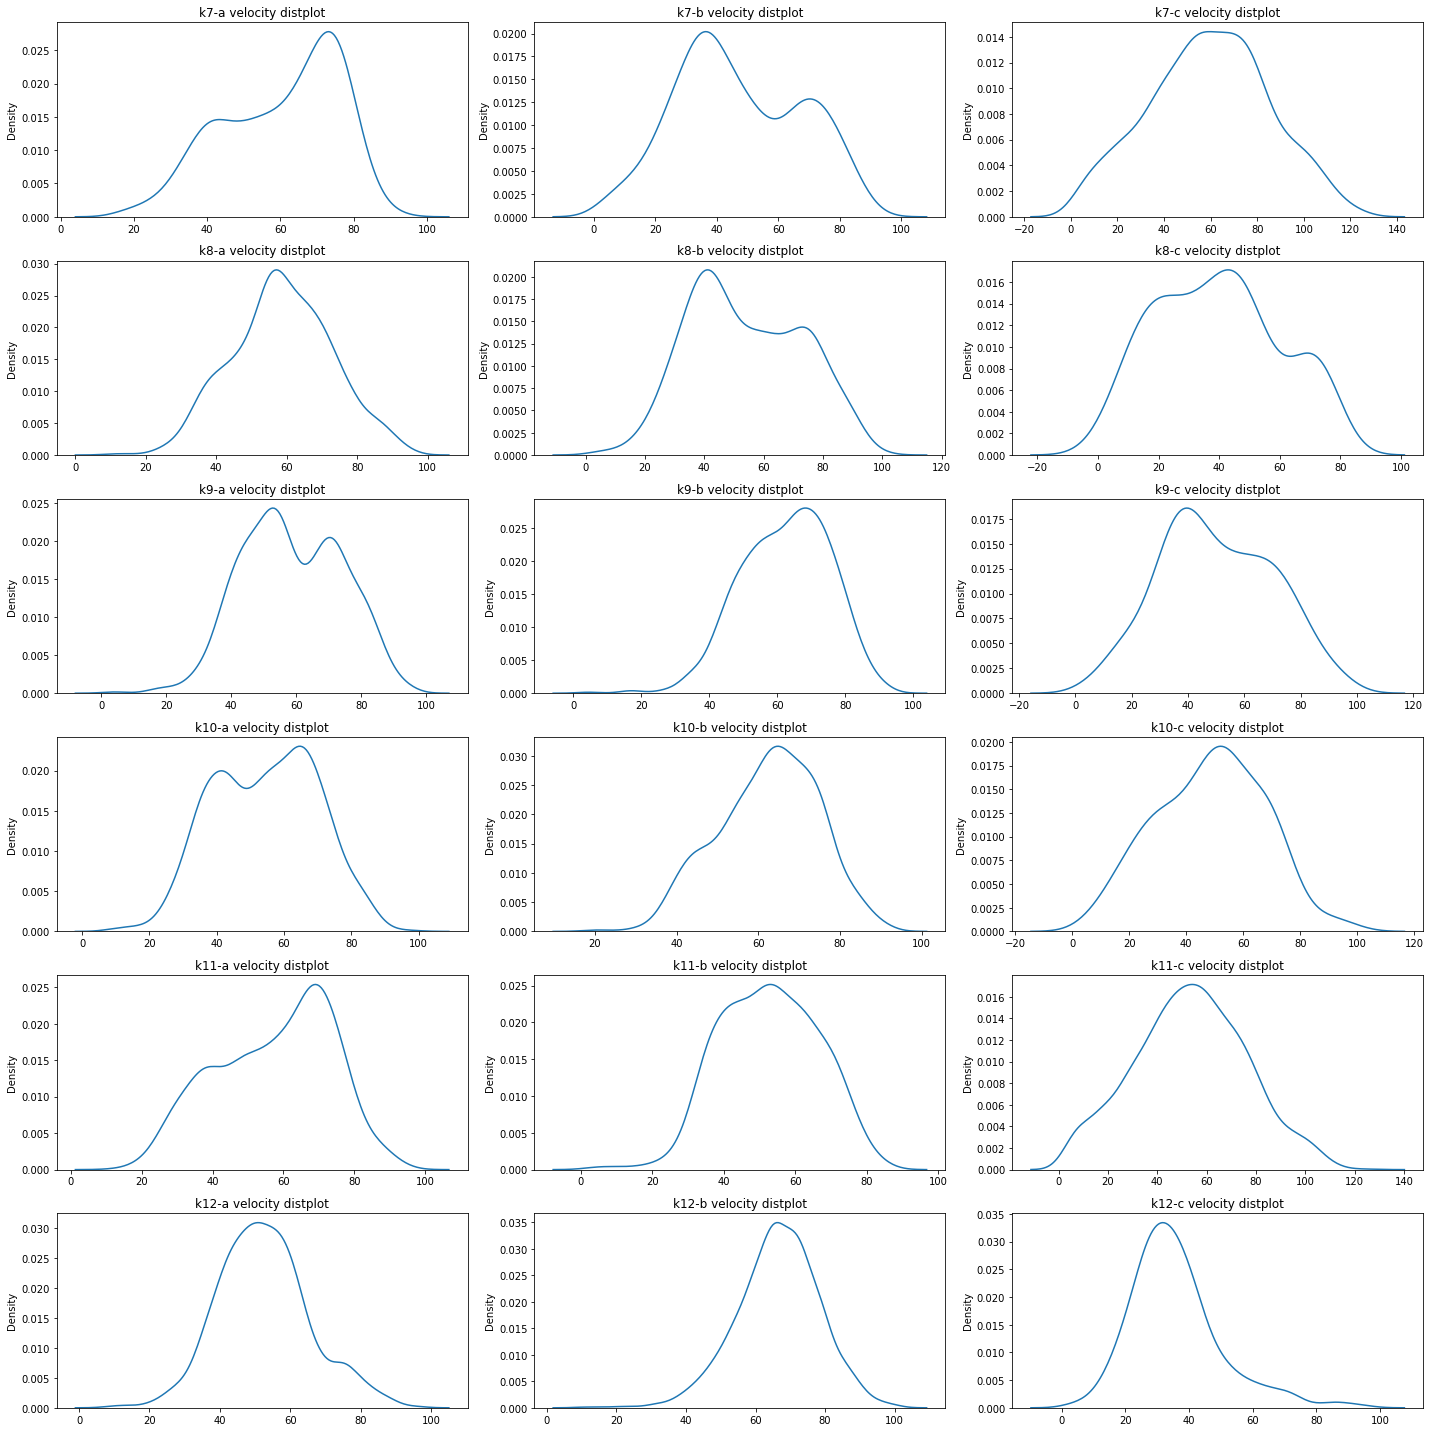

In [61]:
import mido
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

lst=['a','b','c']
num_list=['7','8','9','10','11','12']
fig, ax = plt.subplots(ncols=3,nrows=6,figsize=(20,20))
average=[]
var=[]
std=[]
row_num=0
col_num=0
for k in num_list:
  col_num=0
  for j in lst:
    mid = mido.MidiFile('midi/k'+str(k)+'-'+str(j)+' .mid')
    result1=[]
    result2=[]
    velocity_on=[]
    velocity_off=[]
    noteNum=0
    for i in range(len(mid.tracks[0])-1):
      try:
        save=mid.tracks[0][i].bytes()
        if save[0]==144:
          noteNum=noteNum+1
          result1.append(mid.tracks[0][i].time)
          velocity_on.append(mid.tracks[0][i].velocity)
        elif save[0]==128:
          result2.append(mid.tracks[0][i].time)
          velocity_off.append(mid.tracks[0][i].velocity)
      except:
        continue
    average.append(np.mean(velocity_on))
    var.append(np.var(velocity_on))
    std.append(np.std(velocity_on))
    sns.distplot(velocity_on, hist=False,ax=ax[row_num,col_num])
    ax[row_num,col_num].set_title('k'+str(k)+'-'+str(j)+' velocity distplot')
    col_num=col_num+1
  row_num=row_num+1
plt.tight_layout()
midi['val_average']=average
midi['var']=var
midi['std']=std

In [50]:
midi.to_csv('k7~12_velocity.csv')

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

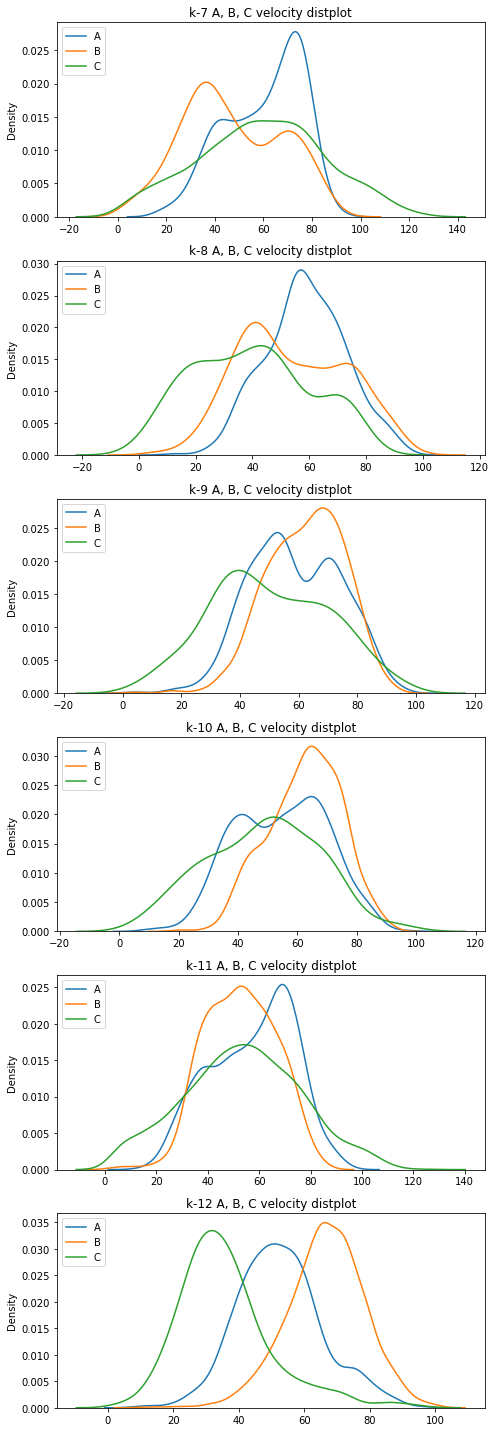

In [74]:
import mido
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

lst=['a','b','c']
num_list=['7','8','9','10','11','12']
fig, ax = plt.subplots(nrows=6,figsize=(7,20))
average=[]
var=[]
std=[]
row_num=0
col_num=0
for k in num_list:
  for j in lst:
    mid = mido.MidiFile('midi/k'+str(k)+'-'+str(j)+' .mid')
    result1=[]
    result2=[]
    velocity_on=[]
    velocity_off=[]
    noteNum=0
    for i in range(len(mid.tracks[0])-1):
      try:
        save=mid.tracks[0][i].bytes()
        if save[0]==144:
          noteNum=noteNum+1
          result1.append(mid.tracks[0][i].time)
          velocity_on.append(mid.tracks[0][i].velocity)
        elif save[0]==128:
          result2.append(mid.tracks[0][i].time)
          velocity_off.append(mid.tracks[0][i].velocity)
      except:
        continue
    average.append(np.mean(velocity_on))
    var.append(np.var(velocity_on))
    std.append(np.std(velocity_on))
    sns.distplot(velocity_on, hist=False,ax=ax[row_num])
    ax[row_num].set_title('k-'+str(k)+' A, B, C velocity distplot')
  ax[row_num].legend(loc='upper left',labels=['A','B','C'])
  row_num=row_num+1
plt.tight_layout()
midi['val_average']=average
midi['var']=var
midi['std']=std